# IMPLEMENTATION OF 3-LAYER NEURAL NETWORK FROM SCRATCH
## BY: M.SOWMIA
## IIT MADARS
## ROLL NO: MA19M020

This project is about implementing a neural network from scratch and see how it performs on a dataset.By "scratch" i mean using only numpy and matplotlib.<br><br>
First ,we try to implement a 3-layer NN with the following different options for hyper-parameters
- Number of neurons in the Hidden-layer (default=3)
- six different types of activation functions
    - ELU (exponential linear unit)
    - RELU (Rectified Linear Units)
    - LeakyReLU (a variant of ReLU)
    - Sigmoid (aka the logit fn)
    - Tanh (actually a function of sigmoid)
    - Softmax (particulary of the output layer when we do multi-class classification)
- Learning rate (incase of SD-method)
- Different optimisation methods
    - Batch-gradient descent
    - stochastic gradient descent
    - mini-batch gradient descent
    
## A 3-LAYER NN 
![title](nn.png)
## The number of neurons:
The number of neurons in the input layer is the number of features in the training dataset.The number of neurons in the hidden-layer can be chosen.Generally the greater the number of the neurons,the better will be the performance of the algorithm on the training set.The number of neurons in the output layer is chosen according to the number of classes in the label.(2 for a binary classifier and k for a label with k-classes).In each of the layers (except of the output layer)there is a additional neuron which accounts for the bias.Note that this bias term always takes the value 1.
## The feed-forward mechanism:
The mechanism is very simple.The input layer is basically a input.(A row/instance) of the dataset.<br><br>
$$\Theta^{(1)}=\text{weights of the first-layer}$$<br>
$$\Theta^{(2)}=\text{weights of the second-layer}$$<br>
For example ,if we had a nn with 5 neurons in input layer,7 in hidden layer(including the bias) and say 2 in output  layer,then our matrix $\Theta^1$ will be a 7x5 matrix and $\Theta^2$ will be a 2x7 matrix.<br>
As a first-step we calculate<br><br>
$$a^{(1)}=X$$<br>
$$z^{(2)}=(\Theta^{(1)})a^{(1)}$$<br>
$$a^{(2)}=g(z^{(2)})\quad\text{where g is the activation function chosen)}$$<br>
$$z^{(3)}=(\Theta^{(2)})a^2$$ <br>
$$a^{(3)}=h(z^{(3)})\quad\text{where h is the softmax activation function)}$$<br>
Finally we get ,$\hat y=h(z^{(3)})$ from the output layer,which tells us the which of the k-classes the instance belongs to.
## COMPUTING DELTA FOR NEURONS:
Once we have predicted the output for a instance using feed-forward mechanism,we can claculate the error by 
<br><br>
$$\delta^{(3)}=y-\hat y$$.We use this to find the errors made by the neurons in second layer given by
<br><br>
$$\delta^{(2)}=((\Theta^{(2)})^T\delta^{(3)}).g'(z^{(2)})$$<br>
When the activation function is sigmoid ,we have $$g'(z)=g(z)(1-g(z))$$<br>
we can write derivative as
$$g'(z^{(2)})=(a^{(2)})^T(1-a^{(2)})$$<br>
In general if the NN consists of L layers,then we first claculate<br>
$$\delta^{(L)}=y-\hat y$$<br>
Then for i=L-1,L-2....2,we caclualte error as follows:<br><br>
$$\delta^{(i)}=((\Theta^{(i)})^T\delta^{(i+1)}).g'(z^{(i)})$$<br><br>

## THE COST-FUNCTION:
There are many possible cost functions,however we will try to restrict our selves to the cost fuunction of logistic regression.For neural networks, it is going to be slightly more complicated:<br><br>
$$J(\Theta)=-\frac{1}{m}\sum_{i=1}^m\sum_{j=1}^n\Big[y_j^{(i)}log(h(x^{(i)})_j+(1-y_j^{(i)})(1-log(h(x^{(i)})_j)\Big]$$where m is number of training examples and n is number of classes.Now ,let us define<br><br>
$$\Delta_{ij}^{(l)}=\frac{\partial J({\Theta})}{\partial \Theta_{ij}^{(l)}}$$<br><br>
After claculating $\delta^{(l)}$ for all layers(except first),we would be having
\begin{equation}
\Delta^{(l)}=\frac{\partial J({\Theta})}{\partial \Theta^{(l)}}=
\begin{bmatrix}
\frac{\partial J({\Theta})}{\partial \Theta_{10}^{(l)}} & \frac{\partial J({\Theta})}{\partial \Theta_{11}^{(l)}} & ....\\
\frac{\partial J({\Theta})}{\partial \Theta_{20}^{(l)}} & \frac{\partial J({\Theta})}{\partial \Theta_{21}^{(l)}} & ....\\
\vdots\\
\vdots\\
\frac{\partial J({\Theta})}{\partial \Theta_{n_{l+1}0}^{(l)}} & \frac{\partial J({\Theta})}{\partial \Theta_{n_{l+1}1}^{(l)}} & ....
\end{bmatrix}
\end{equation}<br><br>
Where $\Delta^{(l)}=\Delta^{(l)}+\delta^{(l+1)}(a^{(l)})^T$<br>

## THE BACK-PROPOGATION ALGORITHM w/o REGULARISATION:
The pseudo code for back-prop works as follwos:<br><br>
initialise random weights $\Theta_1,\Theta_2..\Theta_L$<br>
initiailse $\Delta_{ij}^{(l)}=0 \quad\forall i,j,l$<br><br>
while($cost(\Theta)<\epsilon)||noiter<threshold)$):<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ for each observation i in the training set:<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Fwd propogate and compute $h(i)=a_i^{(L)}$<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Compute $\delta^{(L)}=\hat y_i-a_i^{(L)}$<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Compute $\delta^{(i)}=((\Theta^{(i)})^T\delta^{(i+1)}).g'(z^{(i)})\quad \forall i=2,3...L-1$<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Compute partial derivatives of cost fucntion given by $\Delta^{(l)} =\Delta^{(l)}+\delta^{(l+1)}(a^{(l)})^T \quad \forall l=1,2..L-1$<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ Set $\Delta_{ij}^{(l)}=\frac{1}{m}[\Delta_{ij}^{(l)}]\quad\forall i,j,l$<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ Feed the partial derivatives $\Delta_{ij}^{(l)}$ to gradient descent (or any optimization algorithm) and get the updated weights<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ Update $\Theta_1,\Theta_2..\Theta_L$<br><br>

## THE BACK-PROPOGATION ALGORITHM with REGULARISATION:
The pseudo code for back-prop works as follwos:<br><br>
initialise random weights $\Theta_1,\Theta_2..\Theta_L$<br>
initiailse $\Delta_{ij}^{(l)}=0 \quad\forall i,j,l$<br><br>
while($cost(\Theta)<\epsilon)||noiter<threshold)$):<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ for each observation i in the training set:<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Fwd propogate and compute $h(i)=a_i^{(L)}$<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Compute $\delta^{(L)}=\hat y_i-a_i^{(L)}$<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Compute $\delta^{(i)}=((\Theta^{(i)})^T\delta^{(i+1)}).g'(z^{(i)})\quad \forall i=2,3...L-1$<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Compute partial derivatives of cost fucntion given by $\Delta^{(l)} =\Delta^{(l)}+\delta^{(l+1)}(a^{(l)})^T \quad \forall l=1,2..L-1$<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$Set $\Delta_{ij}^{(l)}=\frac{1}{m}[\Delta_{ij}^{(l)}]+\lambda\Theta_{ij}^{(l)}\quad\forall i,j\neq 0,l$  and $\Delta_{i0}^{(l)}=\frac{1}{m}[\Delta_{i0}^{(l)}]\quad\forall i,l$<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ Feed the partial derivatives $\Delta_{ij}^{(l)}$ to gradient descent (or any optimization algorithm) and get the updated weights<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ Update $\Theta_1,\Theta_2..\Theta_L$<br><br>



## ACTIVATION FUNCTIONS:
### LINEAR:
A straight line function where activation is proportional to input ( which is the weighted sum from neuron ).
#### PROS:
- It gives a range of activations, so it is not binary activation.
- We can definitely connect a few neurons together and if more than 1 fires, we could take the max ( or softmax) and decide based on that.

#### CONS:
- For this function, derivative is a constant. That means, the gradient has no relationship with X.
- It is a constant gradient and the descent is going to be on constant gradient.
- If there is an error in prediction, the changes made by back propagation is constant and not depending on the change in input delta(x) !

### ELU:
Exponential Linear Unit or its widely known name ELU is a function that tend to converge cost to zero faster and produce more accurate results. Different to other activation functions, ELU has a extra alpha constant which should be positive number.

ELU is very similiar to RELU except negative inputs. They are both in identity function form for non-negative inputs. On the other hand, ELU becomes smooth slowly until its output equal to -α whereas RELU sharply smoothes.
#### PROS: 
- ELU becomes smooth slowly until its output equal to -α whereas RELU sharply smoothes.
- ELU is a strong alternative to ReLU.
- Unlike to ReLU, ELU can produce negative outputs.

#### CONS:
- For $x > 0$ , it can blow up the activation with the output range of $[0, \infty]$.


### ReLU:
A recent invention which stands for Rectified Linear Units. The formula is deceptively simple: max(0,z). Despite its name and appearance, it’s not linear and provides the same benefits as Sigmoid but with better performance.
#### PROS:
- It avoids and rectifies vanishing gradient problem.
- ReLu is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations.

#### CONS:
- One of its limitation is that it should only be used within Hidden layers of a Neural Network Model.
- Some gradients can be fragile during training and can die. It can cause a weight update which will makes it never activate on any data point again. Simply saying that ReLu could result in Dead Neurons.
- In another words, For activations in the region (x<0) of ReLu, gradient will be 0 because of which the weights will not get adjusted during descent. That means, those neurons which go into that state will stop responding to variations in error/ input ( simply because gradient is 0, nothing changes ). This is called dying ReLu problem.
- The range of ReLu is $[0, \infty)$. This means it can blow up the activation.

### Leaky RELU:
LeakyRelu is a variant of ReLU. Instead of being 0 when z<0, a leaky ReLU allows a small, non-zero, constant gradient α (Normally,$\alpha$=0.01). However, the consistency of the benefit across tasks is presently unclear.
#### PROS:
- Leaky ReLUs are one attempt to fix the “dying ReLU” problem by having a small negative slope (of 0.01, or so).

#### CONS:
- As it possess linearity, it can’t be used for the complex Classification. It lags behind the Sigmoid and Tanh for some of the use cases.

### SIGMOID:
Sigmoid takes a real value as input and outputs another value between 0 and 1. It’s easy to work with and has all the nice properties of activation functions: it’s non-linear, continuously differentiable, monotonic, and has a fixed output range.
#### PROS:
- It is nonlinear in nature. Combinations of this function are also nonlinear!
- It will give an analog activation unlike step function.
- It has a smooth gradient too.
- It’s good for a classifier.
- The output of the activation function is always going to be in range (0,1) compared to (-inf, inf) of linear function. So we have our activations bound in a range. Nice, it won’t blow up the activations then.

#### CONS:
- Towards either end of the sigmoid function, the Y values tend to respond very less to changes in X.
- It gives rise to a problem of “vanishing gradients”.
- Its output isn’t zero centered. It makes the gradient updates go too far in different directions. 0 < output < 1, and it makes optimization harder.
- Sigmoids saturate and kill gradients.
- The network refuses to learn further or is drastically slow ( depending on use case and until gradient /computation gets hit by floating point value limits ).

### Tanh:
Tanh squashes a real-valued number to the range $[-1, 1]$. It’s non-linear. But unlike Sigmoid, its output is zero-centered. Therefore, in practice the tanh non-linearity is always preferred to the sigmoid nonlinearity.
#### PROS:
- The gradient is stronger for tanh than sigmoid ( derivatives are steeper).

#### CONS:
Tanh also has the vanishing gradient problem.


### Gradient descent algorithms :
#### BATCH GD:
Vanilla gradient descent, aka batch gradient descent, computes the gradient of the cost function w.r.t. to the parameters $\theta$ for the entire training dataset.
#### STOCHASTIC GD:
Stochastic gradient descent (SGD) in contrast performs a parameter update for each training example(randomly selected) x(i) and label y(i)
#### MINI-BATCH GD:
Mini-batch gradient descent finally takes the best of both worlds and performs an update for every mini-batch of n training examples.
#### CHALLENGES :
Vanilla mini-batch gradient descent, however, does not guarantee good convergence, but offers a few challenges that need to be addressed:

- Choosing a proper learning rate can be difficult. A learning rate that is too small leads to painfully slow convergence, while a learning rate that is too large can hinder convergence and cause the loss function to fluctuate around the minimum or even to diverge.
- Learning rate schedules  try to adjust the learning rate during training by e.g. annealing, i.e. reducing the learning rate according to a pre-defined schedule or when the change in objective between epochs falls below a threshold. These schedules and thresholds, however, have to be defined in advance and are thus unable to adapt to a dataset’s characteristics 
- Additionally, the same learning rate applies to all parameter updates. If our data is sparse and our features have very different frequencies, we might not want to update all of them to the same extent, but perform a larger update for rarely occurring features.
- Another key challenge of minimizing highly non-convex error functions common for neural networks is avoiding getting trapped in their numerous suboptimal local minima.These saddle points are usually surrounded by a plateau of the same error, which makes it notoriously hard for SGD to escape, as the gradient is close to zero in all dimensions.

### Adaptive Learning Rate Adjustment Methods:
#### SGD WITH MOMENTUM:
If we run stochastic gradient descent on this function, we get a kind of zigzag behavior. In essence, SGD is making slow progress towards less sensitive direction and more towards high sensitive one and hence does not align in the direction of minimum. In practice, deep neural network could have millions of parameters and hence millions of directions to accommodate for gradient adjustments and hence compounding the problem.In practice, momentum based optimization algorithms are almost always faster then vanilla gradient descent.
#### AdaGrad OPTIMIZATION:
The idea is, for each parameter, we store the sum of squares of all its historical gradients. This sum is later used to scale the learning rate.Notice that, in contrast to previous optimizations, here we have different learning rate for each of the parameter.For parameters with high gradient values, the squared term will be large and hence dividing with large term would make gradient accelerate slowly in that direction. Similarly, parameters with low gradients will produce smaller squared terms and hence gradient will accelerate faster in that direction
#### RMSProp OPTIMIZATION:
This is a slight variation of AdaGrad and works better in practice as it addresses the issues left open by it. Similar to AdaGrad, here as well we will keep the estimate of squared gradient but instead of letting that squared estimate accumulate over training we rather let that estimate decay gradually. To accomplish this, we multiply the current estimate of squared gradients with the decay rate.
#### Adam :
This incorporates all the nice features of RMSProp and Gradient descent with momentum.Specifically, this algorithm calculates an exponential moving average of gradients and the squared gradients whereas parameters beta_1 and beta_2 controls the decay rates of these moving averages


In [2]:
#importing all required datasets
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import sklearn.datasets
import random
import math
from sklearn.utils import shuffle

In [16]:
class ThreeLayerNN:
    
    #class objects initilization
    #NN_config =[a,b,c] a-#no Neurons in input layer,b=# of neurons in hidden layer, c=#of neurons in output layer
    #Theta1~bxa,Theta2~cxb,b1~bx1,b2~cx1
    
    def __init__(self,NN_config,Theta1,Theta2,b1,b2,optimization_method="BGD",lr=0.01,reg_param=0,cost_func="log-loss",decay="const",epsilon=1e-4,noiter=1000,activation="sigmoid",alpha=0.01):
        
        #intilising the configuartion of NN
        self.input_layer=NN_config[0]
        self.hidden_layer=NN_config[1]
        self.output_layer=NN_config[2]
        
        #containers for storing train and test errors
        self.train_error=[]
        self.test_error=[]
        
        #values of the z and activations of three layers
        self.a0 = None
        self.z1 = None
        self.a1 = None
        self.z2 = None
        self.a2 = None
        
        #No of iterations elpased so far
        self.epochs=0
        
        #initilising weights and bias
        self.Theta1=Theta1
        self.Theta2=Theta2
        self.b1=b1
        self.b2=b2
        self.unrolled_weights=np.concatenate((np.ravel(self.Theta1),np.ravel(self.Theta2)),axis=0)
        
        #intialising deltas for weights and bias
        self.delta_Theta1 = np.zeros(self.Theta1.shape)
        self.delta_Theta2 = np.zeros(self.Theta2.shape)
        self.delta_b1 = np.zeros(self.b1.shape)
        self.delta_b2 = np.zeros(self.b2.shape)
        
        #Initialising Tuning parameter for SGD and MBGD optimizers
        self.decay = decay
        self.decay_rate = 0.01
        
        #Initialising Tuning parameter for SGD optimizer with momentum
        self.beta = 0.9
        
        #Initialising Tuning parameters for Adam optimizer
        self.beta1 = 0.9
        self.beta2 = 0.999
        
        #initilising optimization algorithm (SGD,BGD,MBGD)
        self.optimization_method=optimization_method
        #intialising learning rate(SGD,BGD,MBGD)
        self.lr=lr
        #initilaising regularisation parameter
        self.reg_param=reg_param
        #intialising the type of cost function("log-loss","MSE")
        self.cost_func=cost_func
        #intilising the max number of iterations and threshold (whihever occurs first)to stop optimization algortihms
        self.noiter=noiter
        self.epsilon=epsilon
        #intilising the activation of hidden-layer("tanh","sigmoid","RELU","LeakyRELU","ELU","Softmax")
        self.activation=activation
        #initialsing alpha(used in leaky RELU)
        self.alpha=alpha
        
    #Defining a function to calculate the cost_function for one row
    def cost(self,y_actual,y_pred,Theta=None):
        m=len(y_actual)
        if Theta is None:
            Theta = self.unrolled_weights
        if(self.cost_func=="log-loss"):
            pad_term=10e-5 #adding this terms to avoid accidently calculating log(0)
            return ((-1/m*(np.sum(y_actual*np.log(y_pred.clip(pad_term)))))+(self.reg_param/(2*m))*(np.sum(Theta**2)))
        elif(self.cost_func=="MSE"):
            loss = (1/2)*(np.square(y_actual-y_pred).mean(axis = 0))
            return (np.sum(loss, axis = 0)+(self.reg_param/(2*m))*(np.sum(Theta**2)))
        
    
    #defining a funciton to calculate the derivative of the cost function
    #NOTE:we generrally use back-prop to calculate derivatives,howver for checking ,we might require this function
    #Please use this function ony for cross-checking,don't put it in the loop,it will take centuries to run!!
    def gradient_checking(self,y_actual,y_pred):
        epsilon=0.01
        self.unrolled_weights=np.concatenate((np.ravel(self.Theta1),np.ravel(self.Theta2)),axis=0)
        derivatives=[]
        for i in range(len(self.unrolled_weights)):
            fwd_diff=self.unrolled_weights
            fwd_diff[i]=fwd_diff[i]+epsilon
            bwd_diff=self.unrolled_weights
            bwd_diff[i]=bwd_diff[i]-epsilon
            derivatives.append((self.cost(y_actual,y_pred,fwd_diff)-self.cost(y_actual,y_pred,bwd_diff))/(2*epsilon))
        return derivatives
    
    
    #defining a function to give activations for the hidden layer..Z1=Theta1xX+b1 and Z2=Theta2xa2+b2
    def activation_func(self,z):
        if(self.activation=="sigmoid"):
            return 1/(1+np.exp(-z))
        elif(self.activation=="tanh"):
            return ((2/(1+np.exp(-2*z)))-1)
        elif(self.activation=="RELU"):
            return z.clip(min=0)
        elif(self.activation=="LeakyRELU"):
            return (self.alpha*z.clip(max=0))+z.clip(min=0)
        elif(self.activation=="ELU"):
            return ((self.alpha*np.exp(z.clip(max=0)-1))+z.clip(min=0))
        
    #defining function for derivative of activation functions
    def activation_derivative(self,a):
        if(self.activation=="sigmoid"):
            return np.multiply(a, (1.0 - a))
        elif(self.activation=="tanh"):
            return 1-(a**2)
        elif(self.activation=="RELU"):
            return (np.sign(a)+1)/2
        elif(self.activation=="LeakyRELU"):
            return np.sign(a).clip(self.alpha)
        elif(self.activation=="ELU"):
            return ((self.alpha*np.exp(a.clip(max=0)))-(self.alpha*np.sign(a.clip(min=0)))+a.clip(min=0))
        
        
    #defining the soft-max function for the output layer h(x)
    def softmax(self,z):
        scores=np.exp(z)
        total_score=np.sum(np.exp(z))
        return scores/total_score
    
    
    #Defining functions for FORWARD PROPOGATION
    def forward_propogate(self,x):
        self.a0 = x.copy()
        self.z1 = self.Theta1.dot(self.a0) + self.b1
        self.a1 = self.activation_func(self.z1)
        self.z2 = self.Theta2.dot(self.a1) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2
    
    #Defining function for BACKWARD PROPOGATION(to claculate the derivative of cost function with respect to weights)
    def backward_propogate(self,y_actual,y_hat):
        #calculate delta3
        self.delta3 = np.multiply(-y_actual+y_hat,self.activation_derivative(self.a2))
        #therefore calculate delta2 
        self.delta2 = np.multiply(self.Theta2.T.dot(self.delta3),self.activation_derivative(self.a1))
        #calculate derivatives wrt the weights and bias of the cost function
        self.delta_Theta1 = np.outer(self.delta2,self.a0)
        self.delta_Theta2 = np.outer(self.delta3,self.a1)
        self.delta_b1 = self.delta2
        self.delta_b2 = self.delta3
        return self.delta_Theta1,self.delta_Theta2,self.delta_b1,self.delta_b2
        
        
    #functions for predicting ,GD
    def predict(self,x):
        y_pred=self.forward_propogate(x)
        return np.argmax(y_pred)
    
    #Defining function for plotting the decision boundary,please use this function only once at the last,it is very slow
    def plot_decision_boundary(self,X, y):
        # Set min and max values and give it some padding
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        h = 0.1
        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # Predict the function value for the whole gid
        grid_pts=np.c_[xx.ravel(), yy.ravel()]
        Z=[]
        for x in grid_pts:
            Z.append(self.predict(x))
        Z=np.array(Z)
        Z = Z.reshape(xx.shape)
        # Plot the contour and training examples
        plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
        plt.show()
        

    
        
    def Train_Test_compare(self,x_train,y_train,x_test,y_test,decay=None,batch_size=None,decay_rate=None,optimisation_method=None):
        if(decay!=None):
            self.decay = decay
        if(batch_size!=None):
            self.batch_size = batch_size
        if(decay_rate!=None):
            self.decay_rate=decay_rate
        if(optimisation_method!=None):
            self.optimization_method = optimisation_method
            
        
        #Reshaping y to a position vector
        y_train_pos=[]
        for i in range(len(x_train)):
            a=np.zeros(self.output_layer)
            a[y_train[i]]=1
            y_train_pos.append(a)
        y_train_pos=np.array(y_train_pos)
        
        y_test_pos=[]
        for i in range(len(x_test)):
            a=np.zeros(self.output_layer)
            a[y_test[i]]=1
            y_test_pos.append(a)
        y_test_pos=np.array(y_test_pos)
        
        
###------------------------------------code chunk for batch-gradient Descent-------------------------------------------------###
        if(self.optimization_method=="BGD"):
            self.epochs=0
            while(self.epochs<self.noiter):
                self.epochs+=1
                #calculating the test MSE
                y_test_cost=0
                for i in range(len(x_test)):
                    y_test_pred = self.forward_propogate(x_test[i])
                    y_test_cost+= self.cost(y_test_pos[i],y_test_pred)
                self.test_error.append(y_test_cost/len(x_test))
                #training with full batch,calculating train MSE
                y_train_cost=0
                del_Theta1=np.zeros(self.delta_Theta1.shape)
                del_Theta2=np.zeros(self.delta_Theta2.shape)
                del_b1=np.zeros(self.delta_b1.shape)
                del_b2=np.zeros(self.delta_b2.shape)
                for i in range(len(x_train)):
                    y_train_pred = self.forward_propogate(x_train[i])
                    y_train_cost += self.cost(y_train_pos[i],y_train_pred)
                    #checking gradient once
                    #if(epochs==2 and i==2):
                    #    print("calculated gradient is:",self.gradient_checking(y_train_pos[i],y_train_pred))
                    #Finding all deltas and storing them
                    a,b,c,d=self.backward_propogate(y_train_pos[i],y_train_pred)
                    del_Theta1 += a
                    del_Theta2 += b
                    del_b1 += c
                    del_b2 += d
                self.train_error.append(y_train_cost/len(x_train))
                #finding average of deltas
                self.delta_Theta1 = ((del_Theta1)/len(x_train))+self.reg_param*self.Theta1 
                self.delta_Theta2 = (del_Theta2/len(x_train))+self.reg_param*self.Theta2
                self.delta_b1 = (del_b1)/len(x_train)
                self.delta_b2 = (del_b2)/len(x_train)
                #updating weights
                self.Theta1 -= self.lr*self.delta_Theta1
                self.Theta2 -= self.lr*self.delta_Theta2
                self.b1 -= self.lr*self.delta_b1
                self.b2 -= self.lr*self.delta_b2
                self.unrolled_weights = np.concatenate((np.ravel(self.Theta1),np.ravel(self.Theta2)),axis=0)
                #cross checking gradient of cost function
                #if(epochs==1):
                #    print("gradient by back-prop is:",np.concatenate((np.ravel(self.delta_Theta1),np.ravel(self.Theta2)),axis=0))
                #If no significant change in test MSE  ...we stop
                if(self.epochs>5):
                    if(np.abs(self.test_error[self.epochs-1]-self.test_error[self.epochs-2])<self.epsilon):
                        print("The number of iterations required for convergence is:", self.epochs)
                        break
            #Now plot the decision boundary with optimum values of weights and bias found
            self.plot_decision_boundary(x_train,y_train)
            
###--------------------------------------------code chunk for stochastic gradient descent------------------------------------###      
        elif(self.optimization_method=="SGD"):
            self.epochs=0
            while(self.epochs<self.noiter):
                self.epochs+=1
                #calculating the test MSE
                y_test_cost=0
                for i in range(len(x_test)):
                    y_test_pred = self.forward_propogate(x_test[i])
                    y_test_cost+= self.cost(y_test_pos[i],y_test_pred)
                self.test_error.append(y_test_cost/len(x_test))
                #training with random single row from batch,calculating train MSE
                x_train,y_train_pos = shuffle(x_train,y_train_pos)
                row=random.randint(0, len(x_train)-1)
                y_train_pred = self.forward_propogate(x_train[row])
                y_train_cost = self.cost(y_train_pos[row],y_train_pred)
                self.train_error.append(y_train_cost)
                del_Theta1,del_Theta2,self.delta_b1,self.delta_b2=self.backward_propogate(y_train_pos[row],y_train_pred)
                self.delta_Theta1 = del_Theta1+self.reg_param*self.Theta1
                self.delta_Theta2 = del_Theta2+self.reg_param*self.Theta2
                #updating learning rate  for different cases
                #no decay
                if(self.decay=="const"):
                    self.lr = self.lr
                #decay is for every iteration
                elif(self.decay=="time-based"):
                    self.lr *= (1. / (1. + self.decay_rate * self.epochs))
                #decay after every 10 iterations
                elif(self.decay=="step-decay"and (self.epochs%10==0)):
                    drop = 0.5
                    epochs_drop = 10.0
                    self.lr *= math.pow(drop,math.floor((1+self.epochs)/epochs_drop))
                #exponential decay
                elif(self.decay=="exponential"):
                    k=0.1
                    self.lr *=  math.exp(-k*self.epochs)
                #updating weights
                self.Theta1 -= self.lr*self.delta_Theta1
                self.Theta2 -= self.lr*self.delta_Theta2
                self.b1 -= self.lr*self.delta_b1
                self.b2 -= self.lr*self.delta_b2
                self.unrolled_weights = np.concatenate((np.ravel(self.Theta1),np.ravel(self.Theta2)),axis=0)
                 #If no significant change in test MSE  ...we stop
                if(self.epochs>5):
                    if(np.abs(self.test_error[self.epochs-1]-self.test_error[self.epochs-2])<self.epsilon):
                        print("The number of iterations required for convergence is:", self.epochs)
                        break
            #Now plot the decision boundary with optimum values of weights and bias found
            self.plot_decision_boundary(x_train,y_train)
            
###----------------------------------------code chunk for mini-batch gradient descent----------------------------------------###

        elif(self.optimization_method=="MBGD"):
            self.epochs=0
            self.batch_size=32
            while(self.epochs<self.noiter):
                self.epochs+=1
                #calculating the test MSE
                y_test_cost=0
                for i in range(len(x_test)):
                    y_test_pred = self.forward_propogate(x_test[i])
                    y_test_cost += self.cost(y_test_pos[i],y_test_pred)
                self.test_error.append(y_test_cost/len(x_test))
                #training with a mini  batch and calculating train MSE
                y_train_cost=0
                del_Theta1=np.zeros(self.delta_Theta1.shape)
                del_Theta2=np.zeros(self.delta_Theta2.shape)
                del_b1=np.zeros(self.delta_b1.shape)
                del_b2=np.zeros(self.delta_b2.shape)
                #choosing a random batch
                x_train,y_train_pos = shuffle(x_train,y_train_pos)
                x_batch = x_train[:self.batch_size,:]
                y_batch_pos = y_train_pos[:self.batch_size]
                for i in range(self.batch_size):
                    y_train_pred = self.forward_propogate(x_batch[i])
                    y_train_cost += self.cost(y_batch_pos[i],y_train_pred)
                    a,b,c,d=self.backward_propogate(y_batch_pos[i],y_train_pred)
                    del_Theta1 += a
                    del_Theta2 += b
                    del_b1 += c
                    del_b2 += d
                self.train_error.append(y_train_cost/self.batch_size)
                #finding average of deltas
                self.delta_Theta1 = ((del_Theta1)/self.batch_size)+self.reg_param*self.Theta1 
                self.delta_Theta2 = (del_Theta2/self.batch_size)+self.reg_param*self.Theta2
                self.delta_b1 = (del_b1)/self.batch_size
                self.delta_b2 = (del_b2)/self.batch_size
                #decaying learning rate
                #no decay
                if(self.decay=="const"):
                    self.lr = self.lr
                #decay  for every iteration
                elif(self.decay=="time-based"):
                    self.lr *= (1. / (1. + self.decay_rate * self.epochs))
                #decay after every 10 iterations
                elif(self.decay=="step-decay"and (self.epochs%10==0)):
                    drop = 0.5
                    epochs_drop = 10.0
                    self.lr *= math.pow(drop,math.floor((1+self.epochs)/epochs_drop))
                #exponential decay
                elif(self.decay=="exponential"):
                    k=0.1
                    self.lr *=  math.exp(-k*self.epochs)
                #updating weights
                self.Theta1 -= self.lr*self.delta_Theta1
                self.Theta2 -= self.lr*self.delta_Theta2
                self.b1 -= self.lr*self.delta_b1
                self.b2 -= self.lr*self.delta_b2
                self.unrolled_weights = np.concatenate((np.ravel(self.Theta1),np.ravel(self.Theta2)),axis=0)
                #If no significant change in test MSE  ...we stop
                if(self.epochs>5):
                    if(np.abs(self.test_error[self.epochs-1]-self.test_error[self.epochs-2])<self.epsilon):
                        print("The number of iterations required for convergence is:", self.epochs)
                        break
            #Now plot the decision boundary with optimum values of weights and bias found
            self.plot_decision_boundary(x_train,y_train)

###---------------------------------- code chuunk for SGD with momentum ----------------------------------------------------###         
        elif(self.optimization_method=="SGD with momentum"):
            self.epochs=0
            #intialising MOVING AVERAGES of partial derivatives with zeros
            self.delta_Theta1_MA = np.zeros(self.delta_Theta1.shape)
            self.delta_Theta2_MA = np.zeros(self.delta_Theta2.shape)
            self.delta_b1_MA = np.zeros(self.delta_b1.shape)
            self.delta_b2_MA = np.zeros(self.delta_b2.shape)
            while(self.epochs<self.noiter):
                self.epochs+=1
                #calculating the test MSE
                y_test_cost=0
                for i in range(len(x_test)):
                    y_test_pred = self.forward_propogate(x_test[i])
                    y_test_cost+= self.cost(y_test_pos[i],y_test_pred)
                self.test_error.append(y_test_cost/len(x_test))
                #training with random single row from batch,calculating train MSE
                x_train,y_train_pos = shuffle(x_train,y_train_pos)
                row=random.randint(0, len(x_train)-1)
                y_train_pred = self.forward_propogate(x_train[row])
                y_train_cost = self.cost(y_train_pos[row],y_train_pred)
                self.train_error.append(y_train_cost)
                del_Theta1,del_Theta2,self.delta_b1,self.delta_b2=self.backward_propogate(y_train_pos[row],y_train_pred)
                self.delta_Theta1 = del_Theta1+self.reg_param*self.Theta1
                self.delta_Theta2 = del_Theta2+self.reg_param*self.Theta2
                #calculating the Moving Averages for this iteration
                self.delta_Theta1_MA = (self.beta*self.delta_Theta1_MA)+((1-self.beta)*self.delta_Theta1)
                self.delta_Theta2_MA = (self.beta*self.delta_Theta2_MA)+((1-self.beta)*self.delta_Theta2)
                self.delta_b1_MA = (self.beta*self.delta_b1_MA)+((1-self.beta)*self.delta_b1)
                self.delta_b2_MA = (self.beta*self.delta_b2_MA)+((1-self.beta)*self.delta_b2)
                #updating weights
                self.Theta1 -= self.lr*self.delta_Theta1_MA
                self.Theta2 -= self.lr*self.delta_Theta2_MA
                self.b1 -= self.lr*self.delta_b1_MA
                self.b2 -= self.lr*self.delta_b2_MA
                self.unrolled_weights = np.concatenate((np.ravel(self.Theta1),np.ravel(self.Theta2)),axis=0)
                #Doesn't improve..stop
                if(self.epochs>5):
                    if(np.abs(self.test_error[self.epochs-1]-self.test_error[self.epochs-2])<self.epsilon):
                        print("The number of iterations required for convergence is:", self.epochs)
                        break
            #Now plot the decision boundary with optimum values of weights and bias found
            self.plot_decision_boundary(x_train,y_train)
            
###------------------------------------ code chunk for Ada Grad optimisation-----------------------------------------------###
        elif(self.optimization_method=="Ada Grad"):
            self.lr=0.01
            self.epochs=0
            padding =1e-7
            #intialising CUMULATIVE SQUARES of partial derivatives with zeros
            self.delta_Theta1_CS = np.zeros(self.delta_Theta1.shape)
            self.delta_Theta2_CS = np.zeros(self.delta_Theta2.shape)
            self.delta_b1_CS = np.zeros(self.delta_b1.shape)
            self.delta_b2_CS = np.zeros(self.delta_b2.shape)
            while(self.epochs<self.noiter):
                self.epochs+=1
                #calculating the test MSE
                y_test_cost=0
                for i in range(len(x_test)):
                    y_test_pred = self.forward_propogate(x_test[i])
                    y_test_cost+= self.cost(y_test_pos[i],y_test_pred)
                self.test_error.append(y_test_cost/len(x_test))
                #training with random single row from batch,calculating train MSE
                x_train,y_train_pos = shuffle(x_train,y_train_pos)
                row=random.randint(0, len(x_train)-1)
                y_train_pred = self.forward_propogate(x_train[row])
                y_train_cost = self.cost(y_train_pos[row],y_train_pred)
                self.train_error.append(y_train_cost)
                del_Theta1,del_Theta2,self.delta_b1,self.delta_b2=self.backward_propogate(y_train_pos[row],y_train_pred)
                self.delta_Theta1 = del_Theta1+self.reg_param*self.Theta1
                self.delta_Theta2 = del_Theta2+self.reg_param*self.Theta2
                #calculating the CUMULATIVE SQUARES for this iteration
                self.delta_Theta1_CS += np.square(self.delta_Theta1)
                self.delta_Theta2_CS += np.square(self.delta_Theta2)
                self.delta_b1_CS += np.square(self.delta_b1)
                self.delta_b2_CS += np.square(self.delta_b2)
                #updating weights
                self.Theta1 -= (self.lr/np.sqrt(self.delta_Theta1_CS+padding))*self.delta_Theta1
                self.Theta2 -= (self.lr/np.sqrt(self.delta_Theta2_CS+padding))*self.delta_Theta2
                self.b1 -= (self.lr/np.sqrt(self.delta_b1_CS+padding))*self.delta_b1
                self.b2 -= (self.lr/np.sqrt(self.delta_b2_CS+padding))*self.delta_b2
                self.unrolled_weights = np.concatenate((np.ravel(self.Theta1),np.ravel(self.Theta2)),axis=0)
                #Doesn't improve..stop
                if(self.epochs>5):
                    if(np.abs(self.test_error[self.epochs-1]-self.test_error[self.epochs-2])<self.epsilon):
                        print("The number of iterations required for convergence is:", self.epochs)
                        break
            #Now plot the decision boundary with optimum values of weights and bias found
            self.plot_decision_boundary(x_train,y_train)
            
###-------------------------------------- code chunk for RMS Prop -----------------------------------------------------------###
        elif(self.optimization_method== "RMS prop"):
            self.lr = 0.001
            self.epochs = 0
            padding =1e-7
            #intialising CUMULATIVE SQUARES MOVING AVERAGE of partial derivatives with zeros
            self.delta_Theta1_CS_MA = np.zeros(self.delta_Theta1.shape)
            self.delta_Theta2_CS_MA = np.zeros(self.delta_Theta2.shape)
            self.delta_b1_CS_MA = np.zeros(self.delta_b1.shape)
            self.delta_b2_CS_MA = np.zeros(self.delta_b2.shape)
            while(self.epochs<self.noiter):
                self.epochs+=1
                #calculating the test MSE
                y_test_cost=0
                for i in range(len(x_test)):
                    y_test_pred = self.forward_propogate(x_test[i])
                    y_test_cost+= self.cost(y_test_pos[i],y_test_pred)
                self.test_error.append(y_test_cost/len(x_test))
                #training with random single row from batch,calculating train MSE
                x_train,y_train_pos = shuffle(x_train,y_train_pos)
                row=random.randint(0, len(x_train)-1)
                y_train_pred = self.forward_propogate(x_train[row])
                y_train_cost = self.cost(y_train_pos[row],y_train_pred)
                self.train_error.append(y_train_cost)
                del_Theta1,del_Theta2,self.delta_b1,self.delta_b2=self.backward_propogate(y_train_pos[row],y_train_pred)
                self.delta_Theta1 = del_Theta1+self.reg_param*self.Theta1
                self.delta_Theta2 = del_Theta2+self.reg_param*self.Theta2
                #calculating the CUMULATIVE SQUARES MOVING AVERAGE for this iteration
                self.delta_Theta1_CS_MA = (self.beta*self.delta_Theta1_CS_MA)+((1-self.beta)*np.square(self.delta_Theta1))
                self.delta_Theta2_CS_MA = (self.beta*self.delta_Theta2_CS_MA)+((1-self.beta)*np.square(self.delta_Theta2))
                self.delta_b1_CS_MA =  (self.beta*self.delta_b1_CS_MA)+((1-self.beta)*np.square(self.delta_b1))
                self.delta_b2_CS_MA =  (self.beta*self.delta_b2_CS_MA)+((1-self.beta)*np.square(self.delta_b2))
                #updating weights
                self.Theta1 -= (self.lr/np.sqrt(self.delta_Theta1_CS_MA+padding))*self.delta_Theta1
                self.Theta2 -= (self.lr/np.sqrt(self.delta_Theta2_CS_MA+padding))*self.delta_Theta2
                self.b1 -= (self.lr/np.sqrt(self.delta_b1_CS_MA+padding))*self.delta_b1
                self.b2 -= (self.lr/np.sqrt(self.delta_b2_CS_MA+padding))*self.delta_b2
                self.unrolled_weights = np.concatenate((np.ravel(self.Theta1),np.ravel(self.Theta2)),axis=0)
                #Doesn't improve..stop
                if(self.epochs>5):
                    if(np.abs(self.test_error[self.epochs-1]-self.test_error[self.epochs-2])<self.epsilon):
                        print("The number of iterations required for convergence is:", self.epochs)
                        break
            #Now plot the decision boundary with optimum values of weights and bias found
            self.plot_decision_boundary(x_train,y_train)
            
###------------------------------------- code chunk for  Adam optimizer---------------------------------------------------###
        elif(self.optimization_method== "Adam"):
            self.lr = 0.001
            self.epochs = 0
            padding =1e-8
            #intialising CUMULATIVE SQUARES MOVING AVERAGES and CUMULATIVE MOVING AVERAGES with zeros
            self.delta_Theta1_MA = np.zeros(self.delta_Theta1.shape)
            self.delta_Theta2_MA = np.zeros(self.delta_Theta2.shape)
            self.delta_b1_MA = np.zeros(self.delta_b1.shape)
            self.delta_b2_MA = np.zeros(self.delta_b2.shape)
            self.delta_Theta1_CS_MA = np.zeros(self.delta_Theta1.shape)
            self.delta_Theta2_CS_MA = np.zeros(self.delta_Theta2.shape)
            self.delta_b1_CS_MA = np.zeros(self.delta_b1.shape)
            self.delta_b2_CS_MA = np.zeros(self.delta_b2.shape)
            while(self.epochs<self.noiter):
                self.epochs+=1
                #calculating the test MSE
                y_test_cost=0
                for i in range(len(x_test)):
                    y_test_pred = self.forward_propogate(x_test[i])
                    y_test_cost+= self.cost(y_test_pos[i],y_test_pred)
                self.test_error.append(y_test_cost/len(x_test))
                #training with random single row from batch,calculating train MSE
                x_train,y_train_pos = shuffle(x_train,y_train_pos)
                row=random.randint(0, len(x_train)-1)
                y_train_pred = self.forward_propogate(x_train[row])
                y_train_cost = self.cost(y_train_pos[row],y_train_pred)
                self.train_error.append(y_train_cost)
                del_Theta1,del_Theta2,self.delta_b1,self.delta_b2=self.backward_propogate(y_train_pos[row],y_train_pred)
                self.delta_Theta1 = del_Theta1+self.reg_param*self.Theta1
                self.delta_Theta2 = del_Theta2+self.reg_param*self.Theta2
                #calculating the CUMULATIVE SQUARES MOVING AVERAGE and CUMULATIVE MOVING AVERAGE for this iteration
                self.delta_Theta1_MA = (self.beta1*self.delta_Theta1_MA)+((1-self.beta1)*self.delta_Theta1)
                self.delta_Theta2_MA = (self.beta1*self.delta_Theta2_MA)+((1-self.beta1)*self.delta_Theta2)
                self.delta_b1_MA = (self.beta1*self.delta_b1_MA)+((1-self.beta1)*self.delta_b1)
                self.delta_b2_MA = (self.beta1*self.delta_b2_MA)+((1-self.beta1)*self.delta_b2)
                self.delta_Theta1_CS_MA = (self.beta2*self.delta_Theta1_CS_MA)+((1-self.beta2)*np.square(self.delta_Theta1))
                self.delta_Theta2_CS_MA = (self.beta2*self.delta_Theta2_CS_MA)+((1-self.beta2)*np.square(self.delta_Theta2))
                self.delta_b1_CS_MA = (self.beta2*self.delta_b1_CS_MA)+((1-self.beta2)*np.square(self.delta_b1))
                self.delta_b2_CS_MA = (self.beta2*self.delta_b2_CS_MA)+((1-self.beta2)*np.square(self.delta_b2))
                #calculating corrected MA and CSMA
                self.delta_Theta1_MA_corr = (self.delta_Theta1_MA)/(1-math.pow(self.beta1,self.epochs))
                self.delta_Theta2_MA_corr = (self.delta_Theta2_MA)/(1-math.pow(self.beta1,self.epochs))
                self.delta_b1_MA_corr = (self.delta_b1_MA)/(1-math.pow(self.beta1,self.epochs))
                self.delta_b2_MA_corr = (self.delta_b2_MA)/(1-math.pow(self.beta1,self.epochs))
                self.delta_Theta1_CS_MA_corr = (self.delta_Theta1_CS_MA)/(1-math.pow(self.beta2,self.epochs))
                self.delta_Theta2_CS_MA_corr = (self.delta_Theta2_CS_MA)/(1-math.pow(self.beta2,self.epochs))
                self.delta_b1_CS_MA_corr = (self.delta_b1_CS_MA)/(1-math.pow(self.beta2,self.epochs))
                self.delta_b2_CS_MA_corr = (self.delta_b2_CS_MA)/(1-math.pow(self.beta2,self.epochs))
                #updating weights
                self.Theta1 -= (self.lr/(np.sqrt(self.delta_Theta1_CS_MA_corr)+padding))*self.delta_Theta1_MA_corr
                self.Theta2 -= (self.lr/(np.sqrt(self.delta_Theta2_CS_MA_corr)+padding))*self.delta_Theta2_MA_corr
                self.b1 -= (self.lr/(np.sqrt(self.delta_b1_CS_MA_corr)+padding))*self.delta_b1_MA_corr
                self.b2 -= (self.lr/(np.sqrt(self.delta_b2_CS_MA_corr)+padding))*self.delta_b2_MA_corr
                self.unrolled_weights = np.concatenate((np.ravel(self.Theta1),np.ravel(self.Theta2)),axis=0)
                #Doesn't improve..stop
                if(self.epochs>5):
                    if(np.abs(self.test_error[self.epochs-1]-self.test_error[self.epochs-2])<self.epsilon):
                        print("The number of iterations required for convergence is:", self.epochs)
                        break
            #Now plot the decision boundary with optimum values of weights and bias found
            self.plot_decision_boundary(x_train,y_train)

###-------------------------------------- code chunk for AdaMax optimizer ---------------------------------------------------###
        elif(self.optimization_method=="AdaMax"):
            self.lr = 0.002
            self.epochs = 0
            padding =1e-8
            #intialising CUMULATIVE SQUARES MOVING AVERAGES and CUMULATIVE MOVING AVERAGES with zeros
            self.delta_Theta1_MA = np.zeros(self.delta_Theta1.shape)
            self.delta_Theta2_MA = np.zeros(self.delta_Theta2.shape)
            self.delta_b1_MA = np.zeros(self.delta_b1.shape)
            self.delta_b2_MA = np.zeros(self.delta_b2.shape)
            self.delta_Theta1_CS_MA = np.zeros(self.delta_Theta1.shape)
            self.delta_Theta2_CS_MA = np.zeros(self.delta_Theta2.shape)
            self.delta_b1_CS_MA = np.zeros(self.delta_b1.shape)
            self.delta_b2_CS_MA = np.zeros(self.delta_b2.shape)
            while(self.epochs<self.noiter):
                self.epochs+=1
                #calculating the test MSE
                y_test_cost=0
                for i in range(len(x_test)):
                    y_test_pred = self.forward_propogate(x_test[i])
                    y_test_cost+= self.cost(y_test_pos[i],y_test_pred)
                self.test_error.append(y_test_cost/len(x_test))
                #training with random single row from batch,calculating train MSE
                x_train,y_train_pos = shuffle(x_train,y_train_pos)
                row=random.randint(0, len(x_train)-1)
                y_train_pred = self.forward_propogate(x_train[row])
                y_train_cost = self.cost(y_train_pos[row],y_train_pred)
                self.train_error.append(y_train_cost)
                del_Theta1,del_Theta2,self.delta_b1,self.delta_b2=self.backward_propogate(y_train_pos[row],y_train_pred)
                self.delta_Theta1 = del_Theta1+self.reg_param*self.Theta1
                self.delta_Theta2 = del_Theta2+self.reg_param*self.Theta2
                #calculating the CUMULATIVE SQUARES MOVING AVERAGE and CUMULATIVE MOVING AVERAGE for this iteration
                self.delta_Theta1_MA = (self.beta1*self.delta_Theta1_MA)+((1-self.beta1)*self.delta_Theta1)
                self.delta_Theta2_MA = (self.beta1*self.delta_Theta2_MA)+((1-self.beta1)*self.delta_Theta2)
                self.delta_b1_MA = (self.beta1*self.delta_b1_MA)+((1-self.beta1)*self.delta_b1)
                self.delta_b2_MA = (self.beta1*self.delta_b2_MA)+((1-self.beta1)*self.delta_b2)
                self.delta_Theta1_CS_MA = np.maximum((self.beta2*self.delta_Theta1_CS_MA),np.abs(self.delta_Theta1))
                self.delta_Theta2_CS_MA = np.maximum((self.beta2*self.delta_Theta2_CS_MA),np.abs(self.delta_Theta2))
                self.delta_b1_CS_MA = np.maximum((self.beta2*self.delta_b1_CS_MA),np.abs(self.delta_b1))
                self.delta_b2_CS_MA = np.maximum((self.beta2*self.delta_b2_CS_MA),np.abs(self.delta_b2))
                #calculating corrected MA 
                self.delta_Theta1_MA_corr = (self.delta_Theta1_MA)/(1-math.pow(self.beta1,self.epochs))
                self.delta_Theta2_MA_corr = (self.delta_Theta2_MA)/(1-math.pow(self.beta1,self.epochs))
                self.delta_b1_MA_corr = (self.delta_b1_MA)/(1-math.pow(self.beta1,self.epochs))
                self.delta_b2_MA_corr = (self.delta_b2_MA)/(1-math.pow(self.beta1,self.epochs))
                #updating weights
                self.Theta1 -= (self.lr/(self.delta_Theta1_CS_MA))*self.delta_Theta1_MA_corr
                self.Theta2 -= (self.lr/(self.delta_Theta2_CS_MA))*self.delta_Theta2_MA_corr
                self.b1 -= (self.lr/(self.delta_b1_CS_MA))*self.delta_b1_MA_corr
                self.b2 -= (self.lr/(self.delta_b2_CS_MA))*self.delta_b2_MA_corr
                self.unrolled_weights = np.concatenate((np.ravel(self.Theta1),np.ravel(self.Theta2)),axis=0)
                #Doesn't improve..stop
                if(self.epochs>5):
                    if(np.abs(self.test_error[self.epochs-1]-self.test_error[self.epochs-2])<self.epsilon):
                        print("The number of iterations required for convergence is:", self.epochs)
                        break
            #Now plot the decision boundary with optimum values of weights and bias found
            self.plot_decision_boundary(x_train,y_train)
            
###---------------------------------------code chunk for Nadam optimizer---------------------------------------------------###
        elif(self.optimization_method=="Nadam"):
            self.lr = 0.002
            padding = 10e-7
            #intialising CUMULATIVE SQUARES MOVING AVERAGES and CUMULATIVE MOVING AVERAGES with zeros
            self.delta_Theta1_MA = np.zeros(self.delta_Theta1.shape)
            self.delta_Theta2_MA = np.zeros(self.delta_Theta2.shape)
            self.delta_b1_MA = np.zeros(self.delta_b1.shape)
            self.delta_b2_MA = np.zeros(self.delta_b2.shape)
            self.delta_Theta1_CS_MA = np.zeros(self.delta_Theta1.shape)
            self.delta_Theta2_CS_MA = np.zeros(self.delta_Theta2.shape)
            self.delta_b1_CS_MA = np.zeros(self.delta_b1.shape)
            self.delta_b2_CS_MA = np.zeros(self.delta_b2.shape)
            while(self.epochs<self.noiter):
                self.epochs+=1
                #calculating the test MSE
                y_test_cost=0
                for i in range(len(x_test)):
                    y_test_pred = self.forward_propogate(x_test[i])
                    y_test_cost+= self.cost(y_test_pos[i],y_test_pred)
                self.test_error.append(y_test_cost/len(x_test))
                #training with random single row from batch,calculating train MSE
                x_train,y_train_pos = shuffle(x_train,y_train_pos)
                row=random.randint(0, len(x_train)-1)
                y_train_pred = self.forward_propogate(x_train[row])
                y_train_cost = self.cost(y_train_pos[row],y_train_pred)
                self.train_error.append(y_train_cost)
                del_Theta1,del_Theta2,self.delta_b1,self.delta_b2=self.backward_propogate(y_train_pos[row],y_train_pred)
                self.delta_Theta1 = del_Theta1+self.reg_param*self.Theta1
                self.delta_Theta2 = del_Theta2+self.reg_param*self.Theta2
                #calculating the CUMULATIVE SQUARES MOVING AVERAGE and CUMULATIVE MOVING AVERAGE for this iteration
                self.delta_Theta1_MA = (self.beta1*self.delta_Theta1_MA)+((1-self.beta1)*self.delta_Theta1)
                self.delta_Theta2_MA = (self.beta1*self.delta_Theta2_MA)+((1-self.beta1)*self.delta_Theta2)
                self.delta_b1_MA = (self.beta1*self.delta_b1_MA)+((1-self.beta1)*self.delta_b1)
                self.delta_b2_MA = (self.beta1*self.delta_b2_MA)+((1-self.beta1)*self.delta_b2)
                self.delta_Theta1_CS_MA = (self.beta2*self.delta_Theta1_CS_MA)+((1-self.beta2)*np.square(self.delta_Theta1))
                self.delta_Theta2_CS_MA = (self.beta2*self.delta_Theta2_CS_MA)+((1-self.beta2)*np.square(self.delta_Theta2))
                self.delta_b1_CS_MA = (self.beta2*self.delta_b1_CS_MA)+((1-self.beta2)*np.square(self.delta_b1))
                self.delta_b2_CS_MA = (self.beta2*self.delta_b2_CS_MA)+((1-self.beta2)*np.square(self.delta_b2))
                #calculating corrected MA and CSMA
                self.delta_Theta1_MA_corr = (self.delta_Theta1_MA)/(1-math.pow(self.beta1,self.epochs))
                self.delta_Theta2_MA_corr = (self.delta_Theta2_MA)/(1-math.pow(self.beta1,self.epochs))
                self.delta_b1_MA_corr = (self.delta_b1_MA)/(1-math.pow(self.beta1,self.epochs))
                self.delta_b2_MA_corr = (self.delta_b2_MA)/(1-math.pow(self.beta1,self.epochs))
                self.delta_Theta1_CS_MA_corr = (self.delta_Theta1_CS_MA)/(1-math.pow(self.beta2,self.epochs))
                self.delta_Theta2_CS_MA_corr = (self.delta_Theta2_CS_MA)/(1-math.pow(self.beta2,self.epochs))
                self.delta_b1_CS_MA_corr = (self.delta_b1_CS_MA)/(1-math.pow(self.beta2,self.epochs))
                self.delta_b2_CS_MA_corr = (self.delta_b2_CS_MA)/(1-math.pow(self.beta2,self.epochs))
                #updating weights
                self.Theta1 -= (self.lr/(np.sqrt(self.delta_Theta1_CS_MA_corr)+padding))*((self.beta1*self.delta_Theta1_MA_corr)+(((1-self.beta1)/(1-math.pow(self.beta1,self.epochs)))*self.delta_Theta1))
                self.Theta2 -= (self.lr/(np.sqrt(self.delta_Theta2_CS_MA_corr)+padding))*((self.beta1*self.delta_Theta2_MA_corr)+(((1-self.beta1)/(1-math.pow(self.beta1,self.epochs)))*self.delta_Theta2))
                self.b1 -= (self.lr/(np.sqrt(self.delta_b1_CS_MA_corr)+padding))*((self.beta1*self.delta_b1_MA_corr)+(((1-self.beta1)/(1-math.pow(self.beta1,self.epochs)))*self.delta_b1))
                self.b2 -= (self.lr/(np.sqrt(self.delta_b2_CS_MA_corr)+padding))*((self.beta1*self.delta_b2_MA_corr)+(((1-self.beta1)/(1-math.pow(self.beta1,self.epochs)))*self.delta_b2))
                self.unrolled_weights = np.concatenate((np.ravel(self.Theta1),np.ravel(self.Theta2)),axis=0)
                #Doesn't improve..stop
                if(self.epochs>5):
                    if(np.abs(self.test_error[self.epochs-1]-self.test_error[self.epochs-2])<self.epsilon):
                        print("The number of iterations required for convergence is:", self.epochs)
                        break
            #Now plot the decision boundary with optimum values of weights and bias found
            self.plot_decision_boundary(x_train,y_train)
                
    def performance_curve(self):
        plt.plot(range(len(self.train_error)),self.train_error,label="train-error")
        plt.plot(range(len(self.test_error)),self.test_error,label="test-error")
        plt.xlabel('no of iterations')
        plt.title('train error and test error')
        plt.legend(loc="upper right")
        plt.show()           
                    
                
        

In [50]:
NN_config=[2,10,2]
np.random.seed(10)
W1 = np.random.rand(10,2)
W2 = np.random.rand(2,10)
b1 = np.random.rand(10)
b2 = np.random.rand(2)
model=ThreeLayerNN(NN_config,W1,W2,b1,b2,noiter=2000)

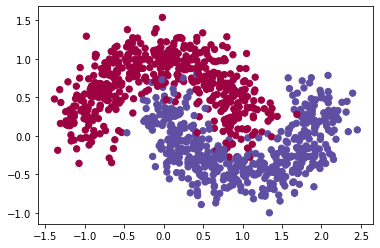

In [19]:
#Creating my own dataset to check the working of the algorithm
np.random.seed(0)
X, y = sklearn.datasets.make_moons(1000, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

### USING MAKE_MOONS DATASET 
### SGD with constant,time-based,step-decay and exponential decay of learning rate

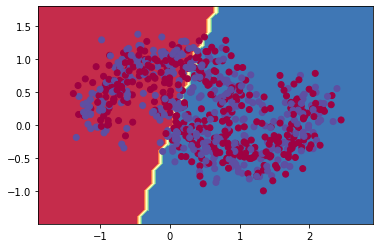

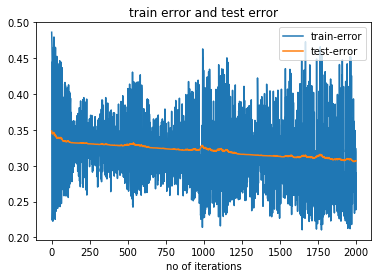

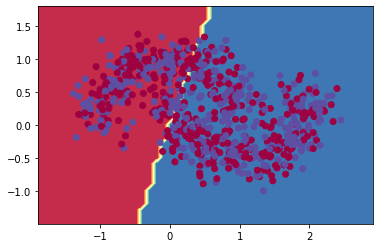

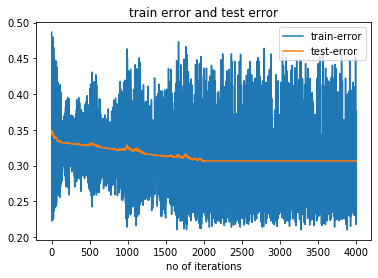

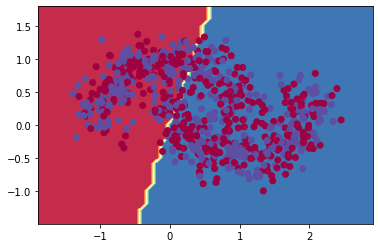

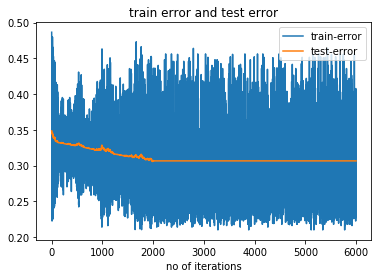

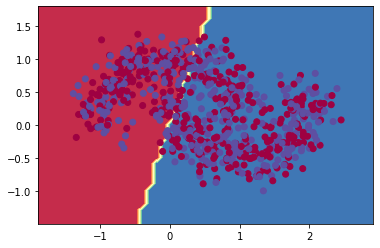

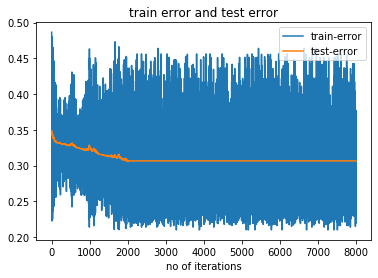

In [27]:
decay=["const","time-based","step-decay","exponential"]
for decay_type in decay:
    model.Train_Test_compare(X[:750,:],y[:750],X[750:,:],y[750:],decay=decay_type,optimisation_method="SGD")
    model.performance_curve()
    plt.show()

### MINI-BATCH GEADIENT DESCENT with constanttime-based,step-wise and exponential decay in learning rate

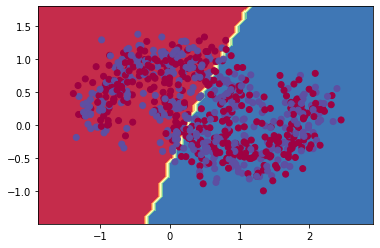

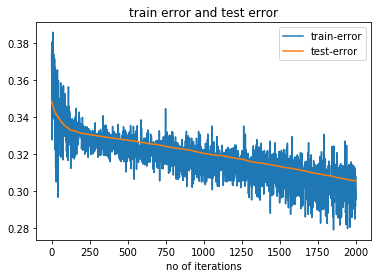

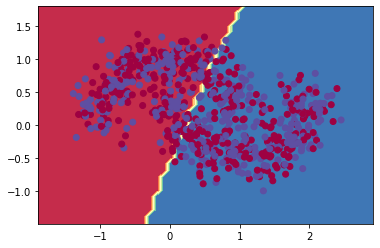

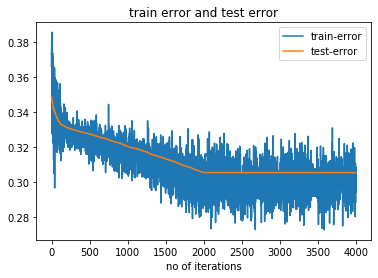

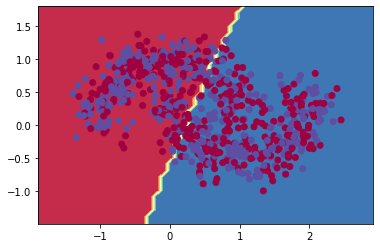

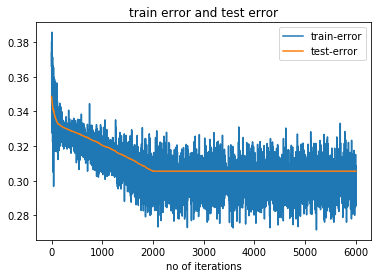

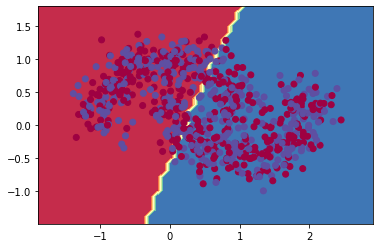

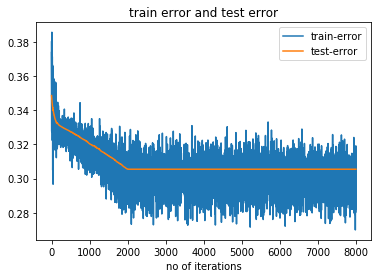

In [51]:
decay=["const","time-based","step-decay","exponential"]
for decay_type in decay:
    model.Train_Test_compare(X[:750,:],y[:750],X[750:,:],y[750:],decay=decay_type,optimisation_method="MBGD")
    model.performance_curve()
    plt.show()

### SGD WITH MOMENTUM:

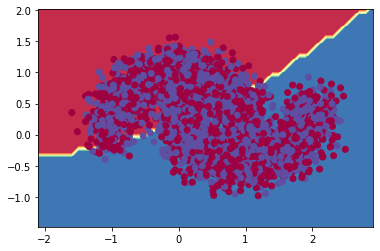

In [53]:
NN_config=[2,15,2]
np.random.seed(10)
W1 = np.random.rand(15,2)
W2 = np.random.rand(2,15)
b1 = np.random.rand(15)
b2 = np.random.rand(2)
model=ThreeLayerNN(NN_config,W1,W2,b1,b2,noiter=3000)
np.random.seed(0)
X, y = sklearn.datasets.make_moons(5000, noise=0.20)
model.Train_Test_compare(X[:3550,:],y[:3550],X[3550:,:],y[3550:],optimisation_method="SGD with momentum")

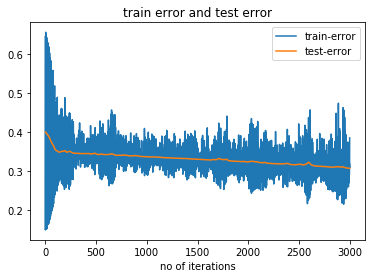

In [54]:
model.performance_curve()

### USING Ada Grad OPTIMISATION:

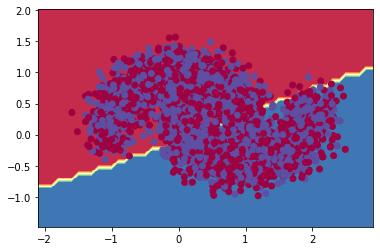

In [4]:
NN_config=[2,15,2]
np.random.seed(10)
W1 = np.random.rand(15,2)
W2 = np.random.rand(2,15)
b1 = np.random.rand(15)
b2 = np.random.rand(2)
model=ThreeLayerNN(NN_config,W1,W2,b1,b2,noiter=3000)
np.random.seed(0)
X, y = sklearn.datasets.make_moons(5000, noise=0.20)
model.Train_Test_compare(X[:3550,:],y[:3550],X[3550:,:],y[3550:],optimisation_method="Ada Grad")

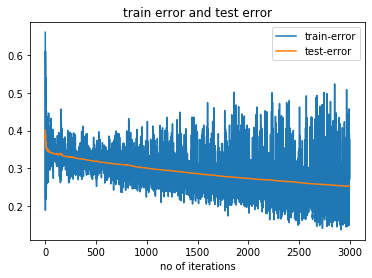

In [5]:
model.performance_curve()

### USING RMS PROP :

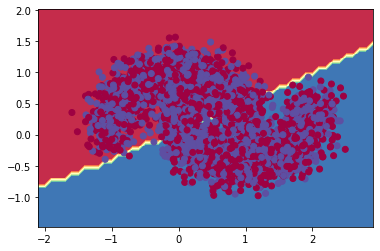

In [8]:
NN_config=[2,15,2]
np.random.seed(10)
W1 = np.random.rand(15,2)
W2 = np.random.rand(2,15)
b1 = np.random.rand(15)
b2 = np.random.rand(2)
model=ThreeLayerNN(NN_config,W1,W2,b1,b2,noiter=3000)
np.random.seed(0)
X, y = sklearn.datasets.make_moons(5000, noise=0.20)
model.Train_Test_compare(X[:3550,:],y[:3550],X[3550:,:],y[3550:],optimisation_method="RMS prop")

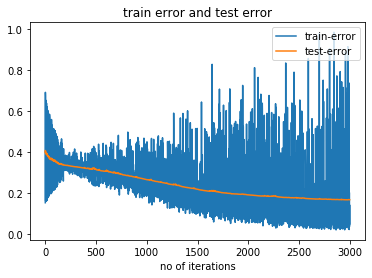

In [9]:
model.performance_curve()

### USING ADAM OPTIMIZER:

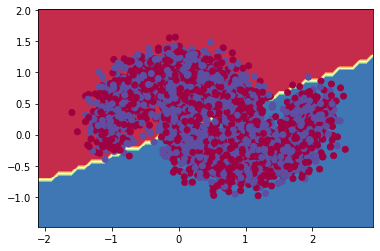

In [10]:
NN_config=[2,15,2]
np.random.seed(10)
W1 = np.random.rand(15,2)
W2 = np.random.rand(2,15)
b1 = np.random.rand(15)
b2 = np.random.rand(2)
model=ThreeLayerNN(NN_config,W1,W2,b1,b2,noiter=3000)
np.random.seed(0)
X, y = sklearn.datasets.make_moons(5000, noise=0.20)
model.Train_Test_compare(X[:3550,:],y[:3550],X[3550:,:],y[3550:],optimisation_method="Adam")

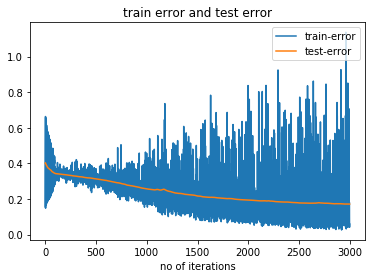

In [11]:
model.performance_curve()

### USING ADAMAX OPTIMIZER:

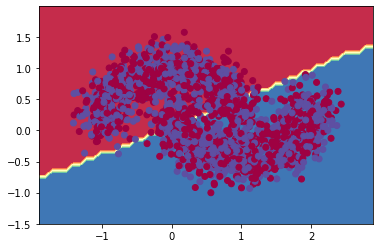

In [20]:
NN_config=[2,15,2]
np.random.seed(10)
W1 = np.random.rand(15,2)
W2 = np.random.rand(2,15)
b1 = np.random.rand(15)
b2 = np.random.rand(2)
model=ThreeLayerNN(NN_config,W1,W2,b1,b2,noiter=3000,epsilon=1e-7)
np.random.seed(0)
X, y = sklearn.datasets.make_moons(4000, noise=0.20)
model.Train_Test_compare(X[:2000,:],y[:2000],X[2000:,:],y[2000:],optimisation_method="AdaMax")

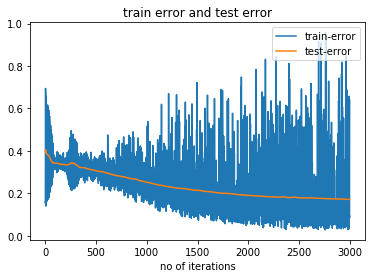

In [21]:
model.performance_curve()

### USING NADAM OPTIMIZER:

The number of iterations required for convergence is: 470


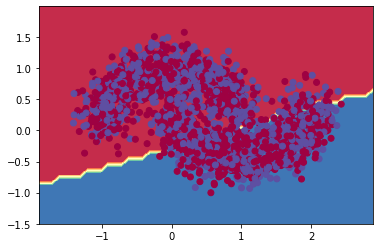

In [24]:
NN_config=[2,15,2]
np.random.seed(10)
W1 = np.random.rand(15,2)
W2 = np.random.rand(2,15)
b1 = np.random.rand(15)
b2 = np.random.rand(2)
model=ThreeLayerNN(NN_config,W1,W2,b1,b2,noiter=3000,epsilon=1e-6)
np.random.seed(0)
X, y = sklearn.datasets.make_moons(4000, noise=0.20)
model.Train_Test_compare(X[:2000,:],y[:2000],X[2000:,:],y[2000:],optimisation_method="Nadam")

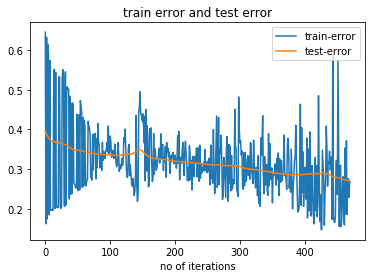

In [26]:
model.performance_curve()